# Substituição por Medidas Centrais

Afim de reduzir a influência dos valores extremos (outliers) em um conjunto de dados, é possível transformá-los em uma medida central como a média ou a mediana. Essa técnica é uma forma simples de lidar com os valores extremos, mas é importante considerar o contexto dos dados e os possíveis efeitos colaterais dessa abordagem, como a distorção da distribuição dos dados.

## Configuração dos dados

In [1]:
# Importando biblioteca pandas
import pandas as pd

# Importando a função minmax_scale da biblioteca scikit-learn
from sklearn.preprocessing import minmax_scale

# Lendo arquivo CSV e transformando em um DataFrame
df = pd.read_csv('dados/diabetes.csv')

# Varrendo colunas do DataFrame
for column in df:

    # Substituindo valores NAN por zero para fins de demonstração
    df[column] = df[column].fillna(0)

    # Dimensiona valores para mesma escala (entre 0 e 1) para fins de visualização de gráfico
    df[column] = minmax_scale(df[column])

# Exibindo 5 primeiras linhas do DataFrame
df.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.269183,0.617284
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.150672,0.382716
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.288505,0.395062
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.071665,0.259259
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.982395,0.000000


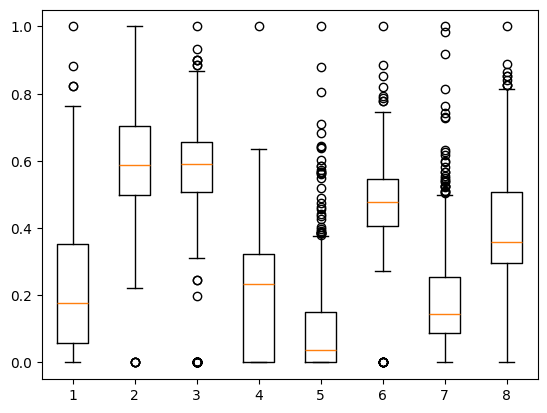

In [2]:
# Importando biblioteca matplotlib
import matplotlib.pyplot as plt

# Exibindo disposição dos dados em um gráfico boxplot
boxplot = plt.boxplot(df)
plt.show()

## Função de Substituição por Medidas Centrais

In [3]:
# Função para substituir dados outliers por mediana ou média
def substituir_mc(dataframe, coluna, medida):

    # Calculando o primeiro quartil (Q1) da coluna
    Q1 = dataframe[coluna].quantile(0.25)
    
    # Calculando o terceiro quartil (Q3) da coluna
    Q3 = dataframe[coluna].quantile(0.75)

    # Calculando a amplitude interquartil (IQR)
    IQR = Q3 - Q1

    # Identificando os outliers
    # (modificando 1.5 para 0.5 da fórmula, para diminuir a quantidade de outliers pós-processamento)
    outliers = dataframe[(dataframe[coluna] < (Q1 - 0.5 * IQR)) | (dataframe[coluna] > (Q3 + 0.5 * IQR))]

    # Verificando se a medida é 'media'
    if medida == 'media':
        
        # Substituindo os valores outliers pela média da coluna
        dataframe.loc[outliers.index, coluna] = dataframe[coluna].mean()

    # Verificando se a medida é 'mediana'
    elif medida == 'mediana':
        
        # Substituindo os valores outliers pela mediana da coluna
        dataframe.loc[outliers.index, coluna] = dataframe[coluna].median()

    # Retornando a coluna modificada do DataFrame
    return dataframe[coluna]

## Substituindo Outliers por Média

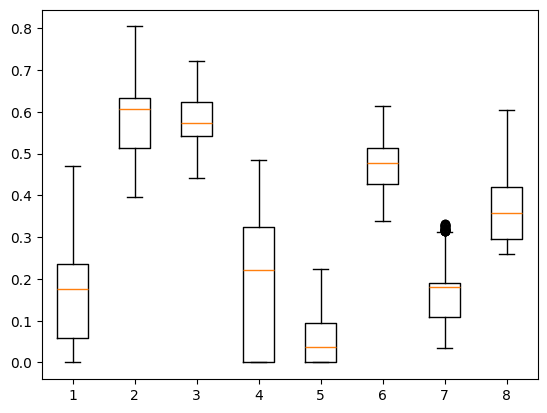

In [4]:
# Configurando novo DataFrame para media
df_media = df

# Varrendo colunas do DataFrame
for column in df_media:

    # Substituindo outliers por média
    df_media[column] = substituir_mc(df_media, column, 'media')

# Exibindo disposição dos dados em um gráfico boxplot
boxplot = plt.boxplot(df_media)
plt.show()

## Substituindo Outliers por Mediana

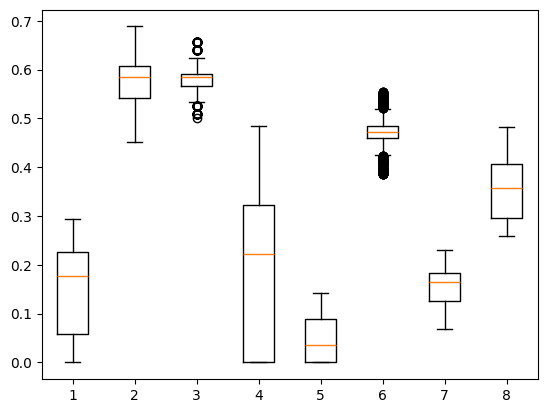

In [5]:
# Configurando novo DataFrame para mediana
df_mediana = df

# Varrendo colunas do DataFrame
for column in df_mediana:

    # Substituindo outliers por média
    df_mediana[column] = substituir_mc(df_mediana, column, 'media')

# Exibindo disposição dos dados em um gráfico boxplot
boxplot = plt.boxplot(df_mediana)
plt.show()

## Considerações Finais

É importante notar, que ao utilizar a técnica, novos outliers são gerados independente da medida central utilizada, e isso se dá porque uma nova disposição de dados é gerada. Contudo, os outliers de fato são suavizados.